In [1]:
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


def null_values_check(df): 

    try:

        if(df.isnull().values.any() == True):
  
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)


dataset_name = 'file2.csv'


try:

    air_qualit_ds = pd.read_csv(dataset_name)
    

    print('Shape of dataset: ' + str(air_qualit_ds.shape))
    print('Total number of records in dataset = ' + str(air_qualit_ds.shape[0]))
    print('Total number of attributes in dataset = ' + str(air_qualit_ds.shape[1]))
    print('')

    null_values_check(air_qualit_ds)

    air_qualit_ds = air_qualit_ds.replace('?', np.nan)
    

    target_class = air_qualit_ds['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = air_qualit_ds.iloc[:, 0:4]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
  
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    

    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['a1', 'a2', 'a3', 'a4'])
    

    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    

    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (1250, 5)
Total number of records in dataset = 1250
Total number of attributes in dataset = 5

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
a1    False
a2    False
a3    False
a4    False
dtype: bool

Now, Are there any missing values in Features? a1    False
a2    False
a3    False
a4    False
dtype: bool

After Pre-processing:
Size of train dataset: 875
Size of test dataset: 375


e:\ProgramData\Anaconda3\envs\yolou_backup_torch_working\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


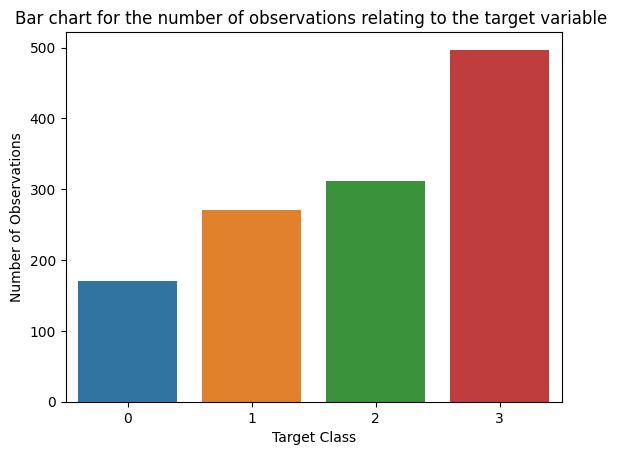

In [3]:
sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

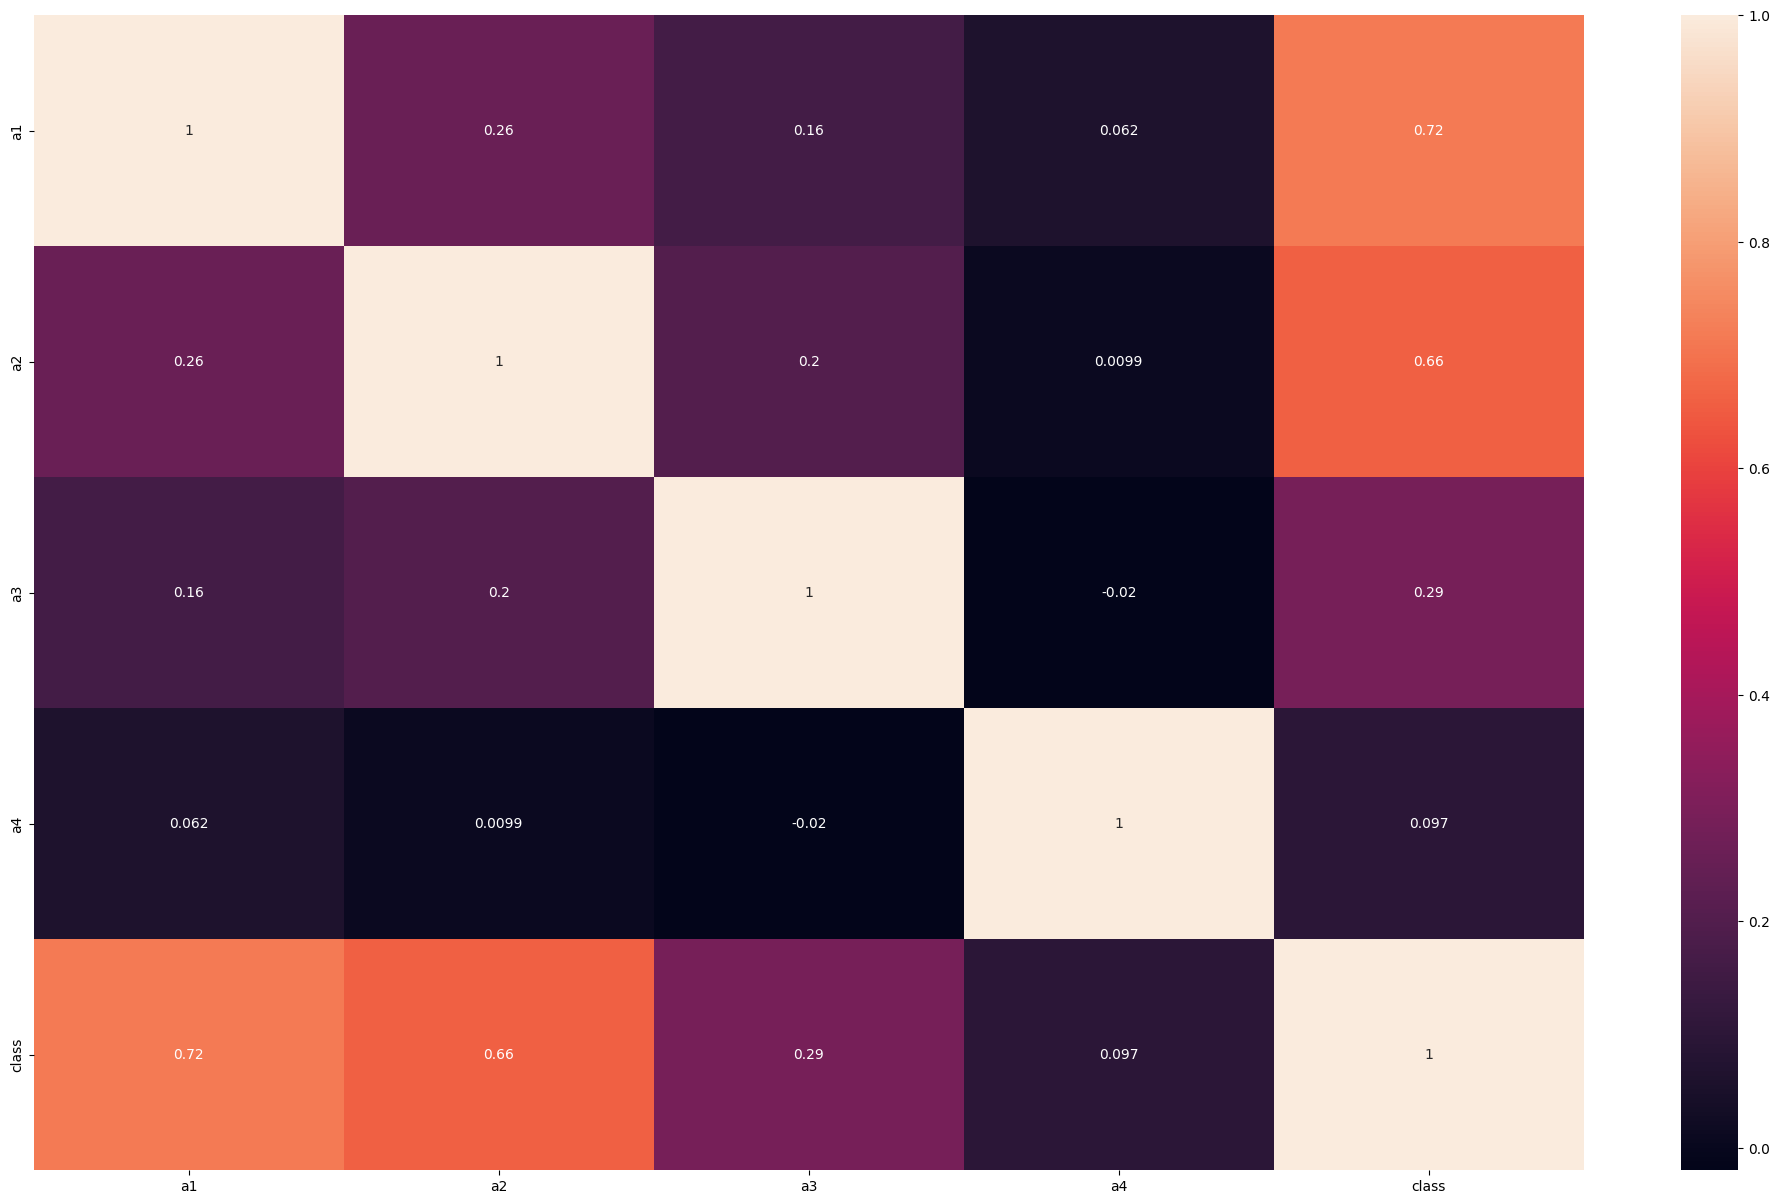

In [4]:
plt.figure(figsize=(25,15)) 
sns.heatmap(pd.concat([feature_classes, target_class1], axis=1, sort=False).corr(), annot=True)
plt.show()

In [5]:
### SVM classifier 
#Support vector machine

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score

support_vector_machine_model = SVC(random_state = 0)


parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}


svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(svm_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))


svm_prediction = svm_grid_search.predict(test_features)


The best parameters are:
 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=100, random_state=0)


[[ 52   4   1   0]
 [  8  68   4   0]
 [  0   1  83   3]
 [  0   0   7 144]]
Precision SVM: 0.92759851095449
Recall SVM   : 0.9253333333333333
F-score SVM  : 0.9254994987612437
accuracy SVM


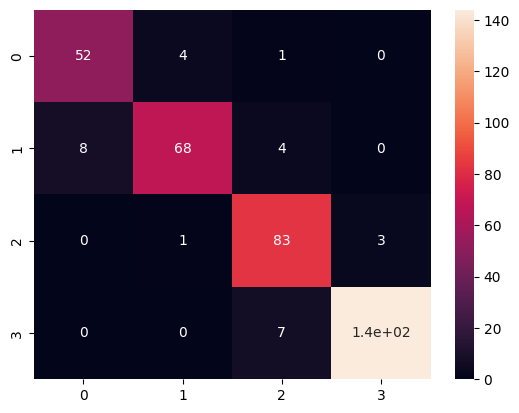

In [6]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_target, svm_prediction, labels=[0,1,2,3]))
precision,recall,fscore,support=score(test_target, svm_prediction,average='weighted')
print ('Precision SVM: {}'.format(precision))
print ('Recall SVM   : {}'.format(recall))
print ('F-score SVM  : {}'.format(fscore))
print('accuracy SVM')
accuracy_score(test_target, svm_prediction)
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

In [7]:
## KNN
#K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier


k_nearest_neighbour_model = KNeighborsClassifier()


knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}


knn_grid_search = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')

knn_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

print('\nThe best model after gridsearch is:\n ' + str(knn_grid_search.best_estimator_))


knn_prediction = knn_grid_search.predict(test_features)


The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 7, 'weights': 'distance'}

The best model after gridsearch is:
 KNeighborsClassifier(n_jobs=1, n_neighbors=7, weights='distance')


[[ 54   3   0   0]
 [ 10  60  10   0]
 [  0   7  75   5]
 [  0   0   9 142]]
Precision KNN : 0.8851840473778163
Recall KNN   : 0.8826666666666667
F-score  KNN : 0.8823507222403193
accuracy KNN


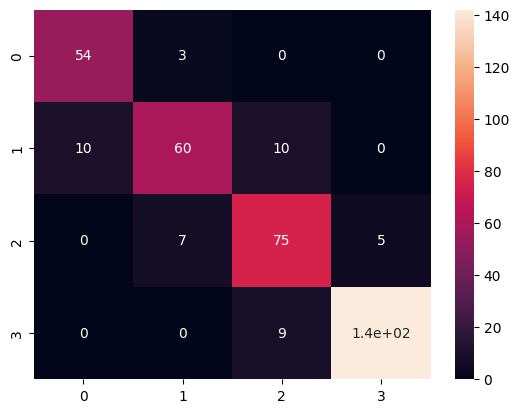

In [8]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_target, knn_prediction, labels=[0,1,2,3]))
precision,recall,fscore,support=score(test_target, knn_prediction,average='weighted')
print ('Precision KNN : {}'.format(precision))
print ('Recall KNN   : {}'.format(recall))
print ('F-score  KNN : {}'.format(fscore))
print('accuracy KNN')
accuracy_score(test_target, knn_prediction)
sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
plt.show()

In [9]:
# decision tree

#Decision tree

from sklearn.tree import DecisionTreeClassifier


decision_tree_model = DecisionTreeClassifier(random_state = 0)


dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}


dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')

dt_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(dt_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

dt_prediction = dt_grid_search.predict(test_features)



C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past be

The best parameters are:
 {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}

The best model after gridsearch is:
 DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=0)


C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[[ 55   2   0   0]
 [  0  79   1   0]
 [  0   0  87   0]
 [  0   0   2 149]]
Precision DT : 0.9869991769547326
Recall   DT : 0.9866666666666667
F-score   DT: 0.9866939111719362
accuracy dt


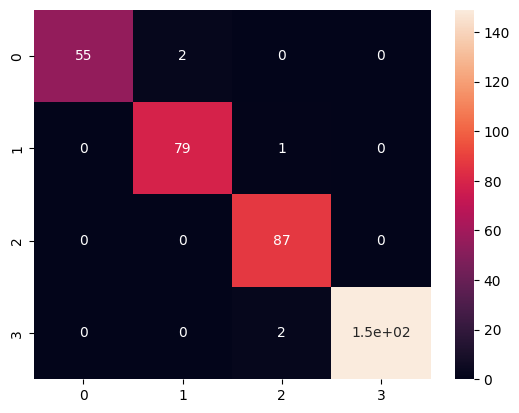

In [10]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_target, dt_prediction, labels=[0,1,2,3]))
precision,recall,fscore,support=score(test_target, dt_prediction,average='weighted')
print ('Precision DT : {}'.format(precision))
print ('Recall   DT : {}'.format(recall))
print ('F-score   DT: {}'.format(fscore))

print('accuracy dt')
accuracy_score(test_target, dt_prediction)
sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()

In [11]:
#Random forest

from sklearn.ensemble import RandomForestClassifier


random_forest_model = RandomForestClassifier(random_state = 0)


rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}


rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')

rf_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(rf_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(test_features)

C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}

The best model after gridsearch is:
 RandomForestClassifier(max_features='auto', n_estimators=10, random_state=0)


C:\Users\chand\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[ 56   1   0   0]
 [  2  78   0   0]
 [  0   0  87   0]
 [  0   0   0 151]]
Precision RF: 0.992058198748727
Recall  RF  : 0.992
F-score RF  : 0.9920096253759911
accuracy RF


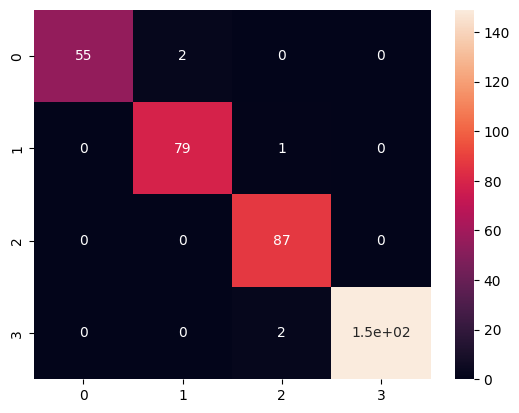

In [12]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(test_target, rf_prediction, labels=[0,1,2,3]))
precision,recall,fscore,support=score(test_target, rf_prediction,average='weighted')
print ('Precision RF: {}'.format(precision))
print ('Recall  RF  : {}'.format(recall))
print ('F-score RF  : {}'.format(fscore))

print('accuracy RF')
accuracy_score(test_target, rf_prediction)
sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()